### Student Information
Name: 張博崴

Student ID: 112061227

GitHub ID: weichang0307

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [301]:
### Begin Assignment Here

In [302]:
# environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Prepare dataset

In [303]:
# load dataset
DATASET = pd.read_csv("Reddit-stock-sentiment.csv")
print(DATASET.shape)
print(DATASET.columns)

(847, 16)
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


In [304]:
DATASET[:2] # show first two rows

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0


In [305]:
# print out first 3 documents
for i in range(3):
    print(f"--- Document {i} ---")
    print(DATASET['title'][i])
    print(DATASET['text'][i])
    print("\n")

--- Document 0 ---
Retardation is on the menu boys! WSB is so back
Calls on retards


--- Document 1 ---
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


--- Document 2 ---
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Seeing lots of red in the ticker.




## Check for missing values

In [306]:
DATASET.isnull().sum() # check for missing values

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

There are 783 null values for downvotes and upvote_ratio, lets see if the null value happens in the same 783 rows.

In [307]:
# first filter out rows with null downvotes and check how many null upvote_ratio are there
DATASET[DATASET['downvotes'].isnull()].isnull().sum()['upvote_ratio']

np.int64(783)

All 783 rows with downvotes has null upvote_ratio, so these two feature are both null if one of them is null. 

Now let's see what is the difference between rows with null and without null

In [308]:
DATASET[DATASET['downvotes'].isnull()][:3] # show first 3 rows with null downvotes

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [309]:
DATASET[DATASET['downvotes'].notnull()][:3] # show first 3 rows without null downvotes

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
48,post,2025-04-02 13:00:42,1jpnz8b,stockstobuytoday,Earnings for current week,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,\n\n [MarketWatch: Stock Market News - Financ...,0.00000,0.000000,0.0,"['Stock', 'MarketWatch', 'catalyst', 'stockbuy...",0.0
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.36803,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0


We can found that the the rows with null downvotes are comments, and rows without null are posts.
Let's check if that is true.

In [310]:
# get all posts and check for missing values
POSTS = DATASET[DATASET['type'] == 'post']
print(POSTS.shape)
POSTS.isnull().sum()

(64, 16)


type            0
datetime        0
post_id         0
subreddit       0
title           0
author          0
url             0
upvotes         0
downvotes       0
upvote_ratio    0
text            0
subjectivity    0
polarity        0
sentiment       0
entities        0
label           0
dtype: int64

In [311]:
# get all comments and check for missing values
COMMENTS = DATASET[DATASET['type'] == 'comment']
print(COMMENTS.shape)
COMMENTS.isnull().sum()

(783, 16)


type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

Now we get two datasets, one for post and one for comment. We can find that there is no null values in post dataset, and all rows in comment dataset have null value for downvotes and upvote_ratio.

So we can drop the columns of downvotes and upvote_ratio of comment dataset.

In [312]:
# drop columns of downvotes and upvote_ratio of comment dataset if they exist
if 'downvotes' in COMMENTS.columns and 'upvote_ratio' in COMMENTS.columns:
    COMMENTS = COMMENTS.drop(columns=['downvotes', 'upvote_ratio'])
COMMENTS[:2]

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0


## Check for duplicated data

In [313]:
print(POSTS.duplicated().sum(), COMMENTS.duplicated().sum()) # check for duplicates

0 0


If we check duplicate for all features, we got no dupplicated data.

However, if we check for only text and title, there are actually some.

In [314]:
# check for duplicates only in text and title
print(POSTS[['text', 'title']].duplicated().sum(), COMMENTS[['text', 'title']].duplicated().sum()) 

22 1


In [315]:
# show the duplicated rows in posts
POSTS[POSTS[['text', 'title']].duplicated(keep=False)].sort_values('title')[:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
786,post,2025-04-03 12:30:39,1jqh5xb,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
409,post,2025-03-25 12:30:39,1jji7cr,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
192,post,2025-03-21 21:15:20,1jgrs02,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.0,0.0,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0
438,post,2025-03-25 21:15:31,1jjukvz,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.0,0.0,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0


In [316]:
# show the duplicated rows in posts
COMMENTS[COMMENTS[['text', 'title']].duplicated(keep=False)].sort_values('title')

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label
34,comment,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,So they went from saying redditors are bad for...,0.666667,-0.7,-1.0,"['market', 'silver']",1.0


If we look at the data, we can find that those posts are same in all features except for timestamp and postid, so those should be just repost or re comments of the same content. Therefore, we can remove those duplicated datas.

In [317]:
COMMENTS = COMMENTS[COMMENTS[['text', 'title']].duplicated(keep='first') == False]
POSTS = POSTS[POSTS[['text', 'title']].duplicated(keep='first') == False]
print(POSTS.shape, COMMENTS.shape)

(42, 16) (782, 14)


## Tokenize text

In [318]:
import helpers.data_mining_helpers as dmh

In [319]:
# Tokenize text of posts and store in new column 'unigrams'
POSTS['unigrams'] = POSTS['text'].apply(lambda x: dmh.tokenize_text(x))
print(POSTS[0:4]['unigrams'])

# Tokenize text of comments and store in new column 'unigrams'
COMMENTS['unigrams'] = COMMENTS['text'].apply(lambda x: dmh.tokenize_text(x))
print(COMMENTS[0:4]['unigrams'])


3     [Vision, Marine, Technologies, Inc., is, rewri...
48    [[, MarketWatch, :, Stock, Market, News, -, Fi...
63    [Please, use, this, thread, to, discuss, your,...
70    [Updated, Daily, by, EOD, [, Daily, Shorts, ],...
Name: unigrams, dtype: object
0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object


In [320]:
list(POSTS[0:1]['unigrams'])

[['Vision',
  'Marine',
  'Technologies',
  'Inc.',
  'is',
  'rewriting',
  'the',
  'watercraft',
  'rulebook',
  '.',
  'Their',
  'collaboration',
  'with',
  'Shaun',
  'Torrente',
  'has',
  'achieved',
  'the',
  'unthinkable',
  '–',
  'a',
  'blazing',
  '116',
  'mph',
  'on',
  'water',
  '!',
  'This',
  'is',
  "n't",
  'just',
  'about',
  'speed',
  ';',
  'it',
  "'s",
  'about',
  'propelling',
  'electric',
  'boating',
  'into',
  'a',
  'new',
  'era',
  '.',
  'Their',
  'cutting-edge',
  'technology',
  ',',
  'combined',
  'with',
  'Torrente',
  "'s",
  'skill',
  ',',
  'is',
  'making',
  'waves',
  'that',
  "'ll",
  'ripple',
  'for',
  'generations',
  '.',
  '*',
  '*',
  'Highlight',
  'Main',
  'Points',
  '*',
  '*',
  '*',
  'Vision',
  'Marine',
  'Technologies',
  'Inc.',
  'achieves',
  'a',
  'record-breaking',
  '116',
  'mph',
  'speed',
  'on',
  'water',
  'with',
  'Shaun',
  'Torrente',
  '.',
  '*',
  'The',
  'feat',
  'highlights',
  'the'

## Analyze text

In [321]:
import seaborn as sns

In [322]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the Document-Term Matrix using CountVectorizer
count_vect_post = CountVectorizer()
Post_counts = count_vect_post.fit_transform(POSTS.text) 
count_vect_comment = CountVectorizer()
Comment_counts = count_vect_comment.fit_transform(COMMENTS.text) 
print(Post_counts.shape, Comment_counts.shape)

(42, 1110) (782, 3883)


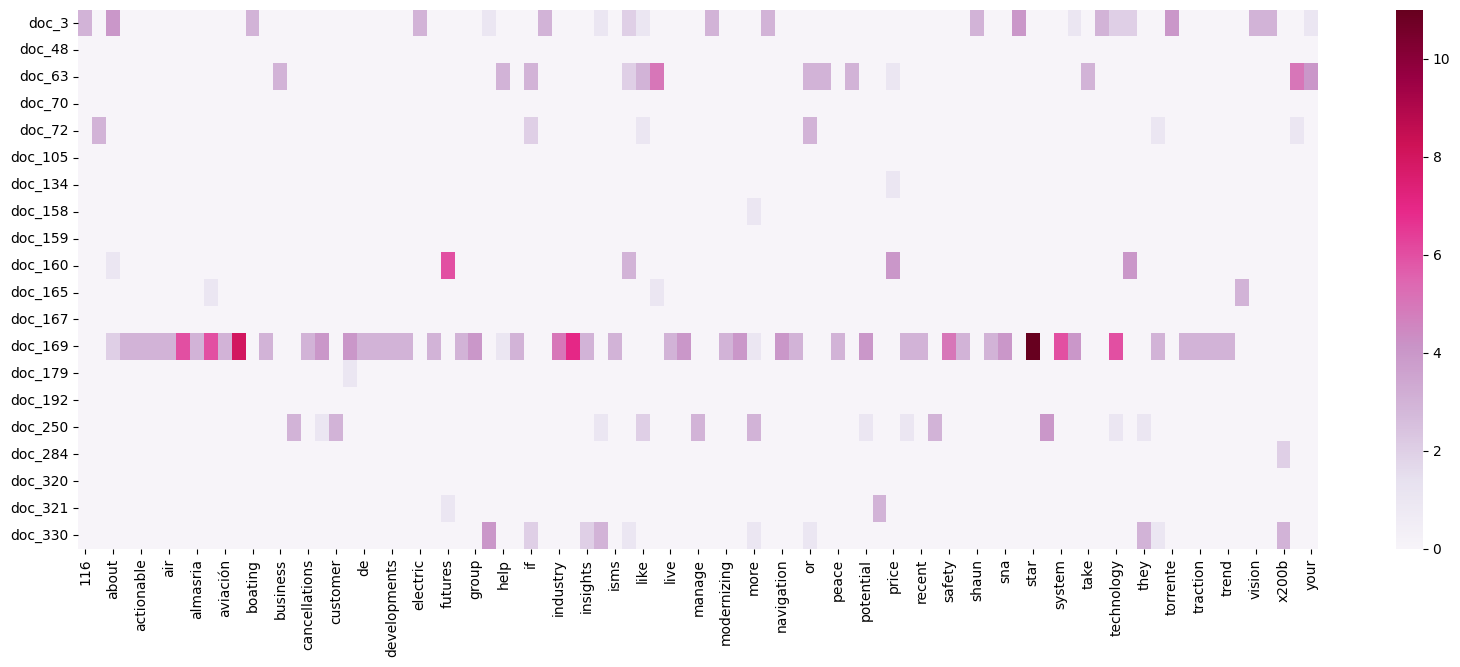

In [323]:

# We analyze the first 20 posts

# We want to drop terms that are not representative, so we make these assumptions:
# 1. If a term is present more than 3 times in a document, then it should be important, thus we keep it
# 2. If a term is present in more than 5 documents, then it is too common (kind of stop word), thus we drop it

# so we keep terms that are present more than 3 times in one of the document, but present in less than 10 documents


# get first 20 documents
count = Post_counts[0:20, :] 

# find and filter out terms that we want to keep
column = (count.max(axis=0) > 2).toarray().ravel() & ((count != 0).sum(axis=0) < 5).A1 
count = count[:, np.where(column == True)[0]] 


# prepare for plotting
plot_x = [str(i) for i in count_vect_post.get_feature_names_out()[column == True]]
plot_y = ["doc_"+ str(i) for i in list(POSTS.index)[0:20]]
plot_z = count.toarray()


# plot the heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=count.max(), annot=False) # set vmax to count.max() to bound the color range



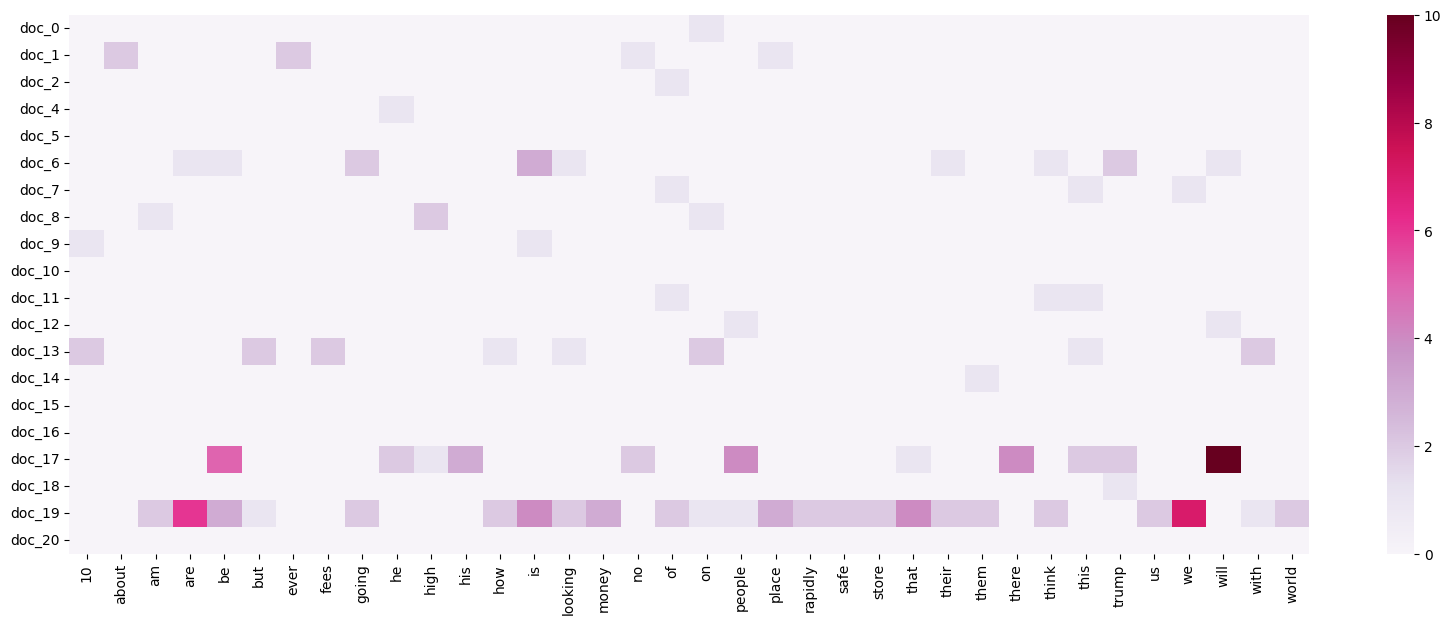

In [324]:

# We analyze the first 20 comments

# We want to drop terms that are not representative, so we make these assumptions:
# 1. If a term is present more than 2 times in a document, then it should be important, thus we keep it
# 2. If a term is present in more than 5 documents, then it is too common (kind of stop word), thus we drop it

# so we keep terms that are present more than 3 times in one of the document, but present in less than 10 documents


# get first 20 documents
count = Comment_counts[0:20, :] 

# find and filter out terms that we want to keep
column = (count.max(axis=0) > 1).toarray().ravel() & ((count != 0).sum(axis=0) < 5).A1 
count = count[:, np.where(column == True)[0]] 


# prepare for plotting
plot_x = [str(i) for i in count_vect_comment.get_feature_names_out()[column == True]]
plot_y = ["doc_"+ str(i) for i in list(COMMENTS.index)[0:20]]
plot_z = count.toarray()


# plot the heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=count.max(), annot=False) # set vmax to count.max() to bound the color range



In [325]:
# get the term frequencies for posts and comments
term_frequencies_posts = []
for j in range(0,Post_counts.shape[1]):
    term_frequencies_posts.append(sum(Post_counts[:,j].toarray())[0])

term_frequencies_comments = []
for j in range(0,Comment_counts.shape[1]):
    term_frequencies_comments.append(sum(Comment_counts[:,j].toarray())[0])

In [326]:
print(len(term_frequencies_posts), len(term_frequencies_comments))

1110 3883


In [327]:
# plot the term frequencies for posts
import plotly.express as px


terms = count_vect_post.get_feature_names_out()
freqs = term_frequencies_posts

word_counts = np.array(freqs).sum()

terms_f = []
freqs_f = []
for i in range(len(terms)):
    if freqs[i] > word_counts/1000: # filter out terms that account for less than 0.1% of total words
        terms_f.append(terms[i])
        freqs_f.append(freqs[i])

df = pd.DataFrame({"term": terms_f, "freq": freqs_f})
fig = px.bar(df, y="freq", x="term", orientation="v")
fig.show()

# plot with descending order
df = df.sort_values('freq', ascending=False)
fig = px.bar(df, y="freq", x="term", orientation="v")
fig.show()


In [328]:
# plot the term frequencies for posts
import plotly.express as px


terms = count_vect_comment.get_feature_names_out()
freqs = term_frequencies_comments

word_counts = np.array(freqs).sum()

terms_f = []
freqs_f = []
for i in range(len(terms)):
    if freqs[i] > word_counts/1000: # filter out terms that account for less than 0.1% of total words
        terms_f.append(terms[i])
        freqs_f.append(freqs[i])

df = pd.DataFrame({"term": terms_f, "freq": freqs_f})
fig = px.bar(df, y="freq", x="term", orientation="v")
fig.show()

# plot with descending order
df = df.sort_values('freq', ascending=False)
fig = px.bar(df, y="freq", x="term", orientation="v")
fig.show()


## Generate new visualization

We can plot distribution of comments' and posts' term frequencies together

In [329]:
# plot distribution of comments and posts term frequencies together

from sklearn.feature_extraction.text import CountVectorizer

# Combine POSTS and COMMENTS for joint analysis
ALL = pd.concat([POSTS, COMMENTS], ignore_index=True)

# Create the Document-Term Matrix using CountVectorizer
count_vect_all = CountVectorizer()
counts = count_vect_all.fit_transform(ALL.text) 
print(ALL.shape, counts.shape)

# get the term frequencies for posts and comments
term_frequencies_post = []
term_frequencies_comment = []
for i in range(counts.shape[1]):
    term_frequencies_post.append(counts[ALL['type'] == 'post'][:,i].toarray().sum())
    term_frequencies_comment.append(counts[ALL['type'] == 'comment'][:,i].toarray().sum())

# plot the term frequencies for posts and comments
import plotly.express as px


terms = count_vect_all.get_feature_names_out()
freqs_post = term_frequencies_post
freqs_comment = term_frequencies_comment

# get word counts
word_counts_post = np.array(freqs_post).sum()
word_counts_comment = np.array(freqs_comment).sum()

# convert to percentage
freqs_post = (np.array(freqs_post)/word_counts_post*100).tolist()
freqs_comment = (np.array(freqs_comment)/word_counts_comment*100).tolist()

# filter out terms that appear too rarely
terms_f = []
freqs_f_post = []
freqs_f_comment = []
for i in range(len(terms)):
    if freqs_post[i] > 0.3 or freqs_comment[i] > 0.3: # filter out terms that appear less than 0.3% in both posts and comments
        terms_f.append(terms[i])
        freqs_f_post.append(freqs_post[i])
        freqs_f_comment.append(freqs_comment[i])


df = pd.DataFrame({"term": terms_f, "freq_post": freqs_f_post, "freq_comment": freqs_f_comment, "freqs_total": np.array(freqs_f_post)+np.array(freqs_f_comment)})
df.sort_values('freqs_total', ascending=False, inplace=True)
fig = px.bar(df, y=["freq_post", "freq_comment"], x="term", orientation="v", barmode='group')
fig.update_yaxes(title_text="Frequency (%)", secondary_y=False)

fig.show()



(824, 17) (824, 4346)


We can see that the distribution of terms in post and comment are quite similar.

We can also plot the difference between them

In [330]:


df['difference'] = (df['freq_post'] - df['freq_comment'])/df['freqs_total']
df.sort_values('difference', ascending=False, inplace=True)
fig = px.bar(df, y="difference", x="term", orientation="v", barmode='group')
fig.update_yaxes(title_text="Difference(post - comment) (%)", secondary_y=False)

fig.show()



In the left of the graph are the terms that appear more frequently in posts, and in the right are the terms that appear more frequently in comments.

We can see that some words which are more specific such as "graphite" or "stockbuyvest" appear more in the posts, and some words which are more general such as "us" or "he" appear more in the comments.

We can use similar idea to compare comments between different sentiments.

In [331]:
# plot distribution of comments and posts term frequencies together

from sklearn.feature_extraction.text import CountVectorizer


# Create the Document-Term Matrix using CountVectorizer
count_vect_all = CountVectorizer()
counts = count_vect_all.fit_transform(COMMENTS.text) 
print(COMMENTS.shape, counts.shape)

# get the term frequencies for positive and negative comments
term_frequencies_pos = []
term_frequencies_neg = []
for i in range(counts.shape[1]):
    term_frequencies_pos.append(counts[COMMENTS['sentiment'] == 1][:,i].toarray().sum())
    term_frequencies_neg.append(counts[COMMENTS['sentiment'] == -1][:,i].toarray().sum())

# plot the term frequencies for posts and comments
import plotly.express as px


terms = count_vect_all.get_feature_names_out()
freqs_pos = term_frequencies_pos
freqs_neg = term_frequencies_neg

# get word counts
word_counts_pos = np.array(freqs_pos).sum()
word_counts_neg = np.array(freqs_neg).sum()

# convert to percentage
freqs_pos = (np.array(freqs_pos)/word_counts_pos*100).tolist()
freqs_neg = (np.array(freqs_neg)/word_counts_neg*100).tolist()

# filter out terms that appear too rarely
terms_f = []
freqs_f_pos = []
freqs_f_neg = []
for i in range(len(terms)):
    if freqs_pos[i] > 0.3 or freqs_neg[i] > 0.3: # filter out terms that appear less than 0.3% in both posts and comments
        terms_f.append(terms[i])
        freqs_f_pos.append(freqs_pos[i])
        freqs_f_neg.append(freqs_neg[i])


df = pd.DataFrame({"term": terms_f, "freq_pos": freqs_f_pos, "freq_neg": freqs_f_neg, "freqs_total": np.array(freqs_f_pos)+np.array(freqs_f_neg)})
df.sort_values('freqs_total', ascending=False, inplace=True)
fig = px.bar(df, y=["freq_pos", "freq_neg"], x="term", orientation="v", barmode='group')
fig.update_yaxes(title_text="Frequency (%)", secondary_y=False)

fig.show()


df['difference'] = (df['freq_pos'] - df['freq_neg'])/df['freqs_total']
df.sort_values('difference', ascending=False, inplace=True)
fig = px.bar(df, y="difference", x="term", orientation="v", barmode='group')
fig.update_yaxes(title_text="Difference(positive - negative) (%)", secondary_y=False)

fig.show()

(782, 15) (782, 3883)


We can see that some words which are more positive such as "good" appear more in the positive comments, and some words which are more negative such as "bad" appear more in the negative comments.

# Phase 2

In [332]:
### Begin Assignment Here